# Tutorial 06 - Plotting

This tutorial demonstrates how to make the plots in the paper.

In [49]:
import os
import numpy as np
import matplotlib.pyplot as plt

from quickstats.plots import General1DPlot, TwoPanel1DPlot
from quickstats.extensions import ExtensionDataFrame
from paws.components import ResultLoader

outdir = "outputs"

result_loader = ResultLoader('high_level', decay_modes=['qq', 'qqq'], variables="3,5,6")

# load back the gathered results
result_loader.load_parquet(os.path.join(outdir, "summary/dedicated_supervised_high_level_qq_qqq.parquet"))
result_loader.load_parquet(os.path.join(outdir, "summary/ideal_weakly_high_level_qq_qqq.parquet"))
result_loader.load_parquet(os.path.join(outdir, "summary/semi_weakly_high_level_qq_qqq.parquet"))

In [56]:
from quickstats.plots import General1DPlot
import matplotlib.pyplot as plt
import numpy as np
import os

styles = {
    (300, 300): {
        'legend': {
            'loc': (0.52, 0.4),
            'fontsize': 14
        },
        'text': {
            'fontsize': 15
        },
        'fill_between': {
            'alpha': 0.3
        },
        'xlabel': {
            'loc': 'center',
            'fontsize': 18,
        },
        'ylabel': {
            'fontsize': 18,
            'loc': 'center',
            'labelpad': 5
        },
        'ytick': {
            'steps': [1, 2, 5]
        }
    },
    (100, 500): {
        'legend': {
            'loc': (0.65, 0.43),
            'fontsize': 14
        },
        'fill_between': {
            'alpha': 0.3
        },
        'text': {
            'fontsize': 15
        },
        'xlabel': {
            'fontsize': 18,
            'loc': 'center',
        },
        'ylabel': {
            'fontsize': 18,
            'loc': 'center',
            'labelpad': 5
        },
        'ytick': {
            'steps': [1, 2, 5]
        }
    }    
}

label_map = {
    'dedicated_supervised': 'Supervised',
    'param_supervised': 'Param Supervised',
    'ideal_weakly': 'Weakly',
    'semi_weakly': 'Semi Weakly',
    'ideal_weakly_noise': 'Weakly (noisy)',
    'semi_weakly_noise': 'Semi Weakly (noisy)'
}

feature_level_labels = {
    'high_level': 'High Level',
    'low_level': 'Low Level'
}

decay_mode_labels = {
    'qq': 'Two-Prong Decay',
    'qqq': 'Three-Prong Decay',
    'qq_qqq': 'Two + Three Prong Decay'
}
styles_map = {
    "ideal_weakly_noise": {
        "linestyle": "--"
    },
    "semi_weakly_noise": {
        "linestyle": "--"
    }
}
xlabel = r"S/B (%)"
ylabel = r"Significance Improvement ($\epsilon_B = 0.1\%$)"
xmin, xmax = 2.5e-4, 0.065
ymax_map = {
    (300, 300): 20,
    (500, 100): 15,
    (100, 500): 15
}
targets = ['dedicated_supervised', 'param_supervised', 'ideal_weakly', 'semi_weakly',
           'ideal_weakly_noise', 'semi_weakly_noise']
logx = True
ypad = 0
xticks      = [3e-4, 5e-4, 1e-3, 5e-3, 1e-2,  5e-2]
xticklabels = ['0.03', '0.05', '0.1', '0.5', '1',  '5']

def mu2sig(mu):
    # change this to the actual number of background events used in training + validation
    B = 183577 + 91763
    S = B * mu
    return S / B**0.5

def sig2mu(sig):
    # change this to the actual number of background events used in training + validation
    B = 183577 + 91763
    S = sig * B**0.5
    return S / B

xticks2 = mu2sig(np.array(xticks))
xticklabels2 = [str(round(v, 2)) for v in xticks2]

color_cycle = ["hh:darkpink",  "#BF51A0", "#deba87", "#3CAEA3", "#20639B"]

text_loc = {
    (300, 300): (0.555, 0.70),
    (500, 100): (0.685, 0.68),
    (100, 500): (0.685, 0.68)    
}
text_dy = 0.02

<Figure size 640x480 with 0 Axes>

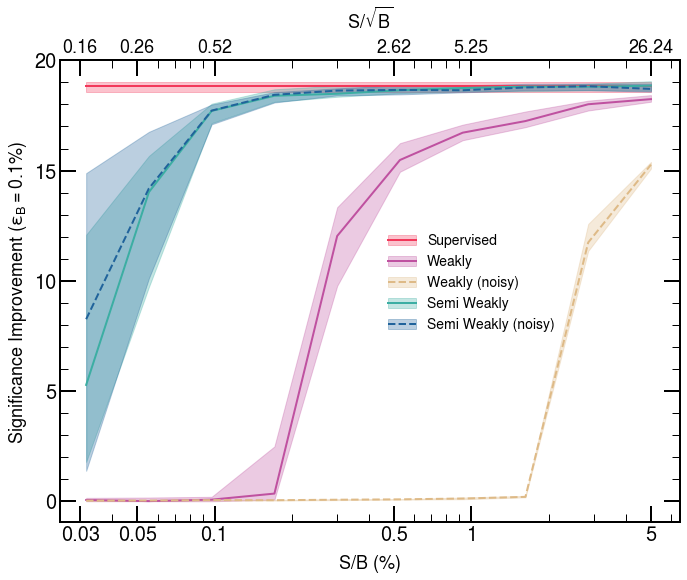

<Figure size 640x480 with 0 Axes>

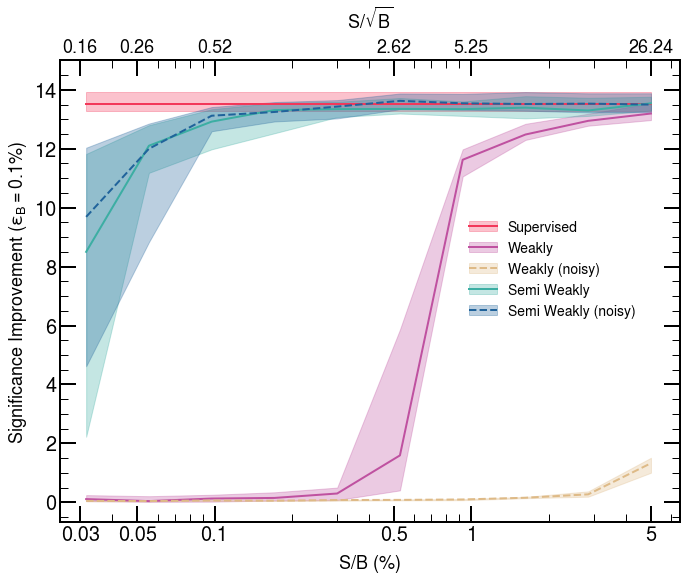

In [57]:
feature_level = 'high_level'
decay_mode = 'qq_qqq'
mass_points = [[300, 300], [100, 500]]
metric = 'sic_1e3'

for mass_point in mass_points:
    m1, m2 = mass_point
    df = result_loader.get_ensemble_result([metric], select={("m1", "m2"): (m1, m2)})
    df_ext = ExtensionDataFrame(df)
    dfs = {
        'dedicated_supervised': df_ext.select_values(index={
            "model_type": "dedicated_supervised",
            "noise_dim": 0,
            "version": "v1"
        }),
        'ideal_weakly': df_ext.select_values(index={
            "model_type": "ideal_weakly",
            "noise_dim": 0,
            "version": "fixed"
        }),
        'ideal_weakly_noise': df_ext.select_values(index={
            "model_type": "ideal_weakly",
            "noise_dim": 10,
            "version": "fixed"
        }),
        'semi_weakly': df_ext.select_values(index={
            "model_type": "semi_weakly",
            "noise_dim": 0,
            "version": "v1_kappa_sampled"
        }),
        'semi_weakly_noise': df_ext.select_values(index={
            "model_type": "semi_weakly",
            "noise_dim": 10,
            "version": "v1_kappa_sampled"
        }),
    }
    
    plotter = General1DPlot(dfs, color_cycle=color_cycle,
                            label_map=label_map, styles=styles[(m1, m2)],
                            styles_map=styles_map)
    ifpr = metric.replace("sig_", "")
    #y_label_ = ylabel.format(ifpr=ifpr)
    ax = plotter.draw("mu", metric, f"{metric}_errlo", f"{metric}_errhi",
                      xlabel=xlabel, ylabel=ylabel,
                      xmin=xmin, xmax=xmax,
                      ymax=ymax_map[(m1, m2)],
                      logx=logx)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax2 = ax.secondary_xaxis('top', functions=(mu2sig, sig2mu))
    ax2.tick_params(axis="x", which="major", length=0,
                    width=0, labeltop=True, labelbottom=False,
                    top=True, bottom=False, direction='in',
                    labelsize=18)
    ax2.tick_params(axis="x", which="minor", length=0,
                    width=0, labeltop=True, labelbottom=False,
                    top=True, bottom=False, direction='in',
                    labelsize=18)
    ax2.set_xticks(xticks2)
    ax2.set_xticklabels(xticklabels2)
    ax2.set_xlabel(r"$S/\sqrt{B}$", labelpad=10, fontsize=18)
    outname = os.path.join(outdir, f"plots/money/high_level_qq_qqq_{m1}_{m2}_sic_1e3.pdf")
    plt.savefig(outname, bbox_inches='tight')
    plt.show()

In [58]:
feature_level ='high_level'
decay_mode = 'qq_qqq'
mass_points = [[300, 300], [100, 500]]
metrics = {
    'qq': ['m1_pred', 'm2_pred', 'mu_pred'],
    'qqq': ['m1_pred', 'm2_pred', 'mu_pred'],
    'qq_qqq': ['m1_pred', 'm2_pred', 'mu_pred', 'alpha_pred'],
}

In [59]:
styles = {
    'legend': {
        'loc': (0.66, 0.5),
        'fontsize': 18,
        'ncol': 2
    },
    'legend_lower': {
        'loc': (0.66, 0.22),
        'fontsize': 18,
        'ncol': 2
    },
    'text': {
        'fontsize': 18
    },
    'xlabel': {
        'fontsize': 18,
        'loc': 'center',
    },
    'ylabel': {
        'fontsize': 18,
        'loc': 'center',
        'labelpad': 5
    },
    'fill_between':{
        'alpha':0.3
    }
}

label_map = {
    'm1_pred': '$m_X$',
    'm2_pred': '$m_Y$',
    'mu_pred': r'$\mu$',
    'alpha_pred': r'$\alpha$',
}

feature_level_labels = {
    'high_level': 'High Level',
    'low_level': 'Low Level'
}

decay_mode_labels = {
    'qq': 'Two-Prong Decay',
    'qqq': 'Three-Prong Decay',
    'qq_qqq': 'Two + Three Prong Decay'
}
xlabel = r"S/B (%)"
ylabel_first = f"Predicted Mass (GeV)"
ylabel_second = f"Predicted Fraction (%)"
xmin, xmax = 2.5e-4, 0.07
ymin_first, ymax_first = 0.05 * 100, 6 * 100
ymin_second, ymax_second = 2e-4, 1.2
logx = True
logy_second = True
ypad = 0
xticks      = [3e-4, 5e-4, 1e-3, 5e-3, 1e-2,  5e-2]
xticklabels = ['0.03', '0.05', '0.1', '0.5', '1',  '5']
yticks_first = [100, 200, 300, 400, 500, 600]
yticklabels_first = ['100', '200', '300', '400', '500', '600']
yticks_second = [1e-3, 1e-2, 5e-2, 5e-1]
yticklabels_second = ['0.1', '1', '5', '50']

color_cycle = ["hh:darkpink", "#20639B"]
color_cycle_lower = ["#3CAEA3", "#deba87" ]

text_loc = (0.64, 0.2)
text_dy = 0.02


xticks2 = mu2sig(np.array(xticks))
xticklabels2 = [str(round(v, 2)) for v in xticks2]

<Figure size 640x480 with 0 Axes>

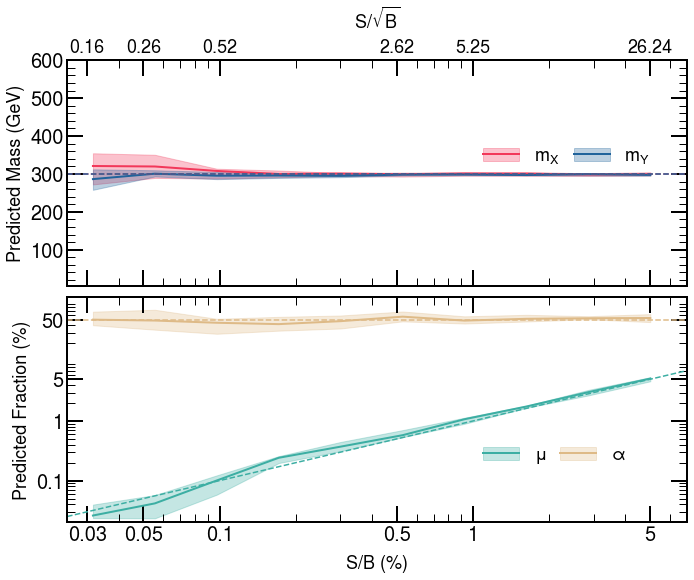

<Figure size 640x480 with 0 Axes>

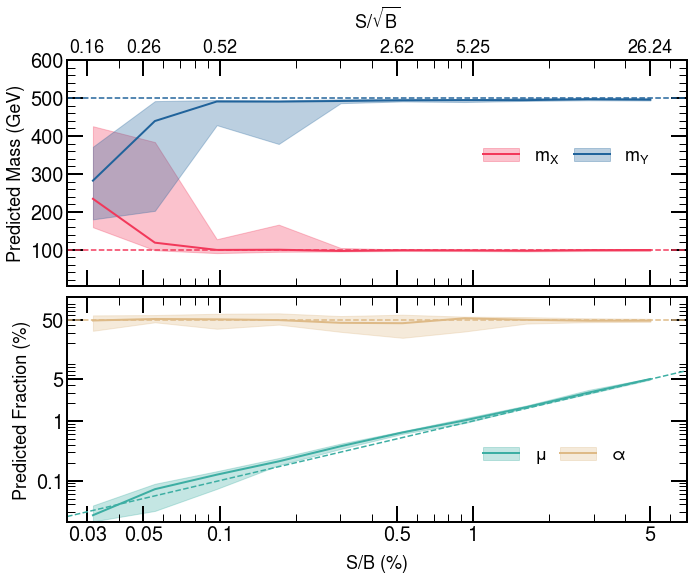

In [60]:
import os
import matplotlib.pyplot as plt

for mass_point in mass_points:
    m1, m2 = mass_point
    
    df = result_loader.get_ensemble_result(metrics[decay_mode], model_types=['semi_weakly'],
                                           select={("m1", "m2"): (m1, m2),
                                                   "version": "v1_kappa_sampled",
                                                   "noise_dim": 0})
    dfs = {}
    for metric in metrics[decay_mode]:
        df_metric = df.copy()
        df_metric['param'] = df_metric[f'{metric}']
        df_metric['param_errlo'] = df_metric[f'{metric}_errlo']
        df_metric['param_errhi'] = df_metric[f'{metric}_errhi']
        if metric in ['m1_pred', 'm2_pred']:
            df_metric['param'] = df_metric['param'] * 100
            df_metric['param_errlo'] = df_metric['param_errlo'] * 100
            df_metric['param_errhi'] = df_metric['param_errhi'] * 100
        dfs[metric] = df_metric

    plotter = TwoPanel1DPlot(dfs, color_cycle=color_cycle,
                             color_cycle_lower=color_cycle_lower,
                             label_map=label_map,
                             styles=styles)
    ax, ax2 = plotter.draw("mu", "param",
                           targets_upper=["m1_pred", "m2_pred"],
                           targets_lower=["mu_pred", "alpha_pred"],
                           yerrloattrib=f"param_errlo",
                           yerrhiattrib=f"param_errhi",
                           xlabel=xlabel,
                           ylabel_upper=ylabel_first,
                           ylabel_lower=ylabel_second,
                           xmin=xmin, xmax=xmax,
                           logy_lower=logy_second,
                           ymin_upper=ymin_first,
                           ymax_upper=ymax_first,
                           ymin_lower=ymin_second,
                           ymax_lower=ymax_second,
                           logx=logx)
    
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax.set_yticks(yticks_first)
    ax.set_yticklabels(yticklabels_first)
    ax2.set_yticks(yticks_second)
    ax2.set_yticklabels(yticklabels_second)
    ax.axhline(m1, linestyle='--', color=plotter.cmap.colors[0])
    ax.axhline(m2, linestyle='--', color=plotter.cmap.colors[1])
    mu_arrays = np.linspace(xmin, xmax, 100)
    ax2.plot(mu_arrays, mu_arrays, linestyle='--', color=plotter.cmap_lower.colors[0])
    if decay_mode == 'qq_qqq':
        ax2.axhline(0.5, linestyle='--', color=plotter.cmap_lower.colors[1])
    
    ax3 = ax.secondary_xaxis('top', functions=(mu2sig, sig2mu))
    ax3.tick_params(axis="x", which="major", length=0,
                    width=0, labeltop=True, labelbottom=False,
                    top=True, bottom=False, direction='in',
                    labelsize=18)
    ax3.tick_params(axis="x", which="minor", length=0,
                    width=0, labeltop=True, labelbottom=False,
                    top=True, bottom=False, direction='in',
                    labelsize=18)
    ax3.set_xticks(xticks2)
    ax3.set_xticklabels(xticklabels2)
    ax3.set_xlabel(r"$S/\sqrt{B}$", labelpad=10, fontsize=18)
    outname = os.path.join(outdir, f"plots/money/high_level_qq_qqq_{m1}_{m2}_params.pdf")
    plt.savefig(outname, bbox_inches='tight')
    plt.show()